<a href="https://colab.research.google.com/github/Ishita95-harvad/Cats-Vs-Dogs/blob/main/Eye_Image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eye Image Dataset
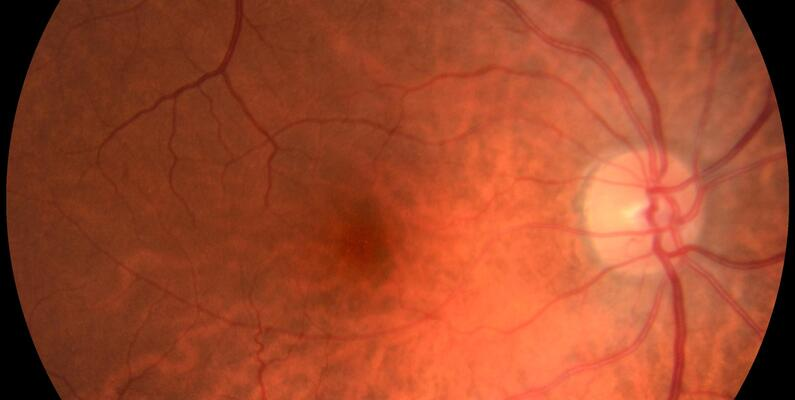
It consists of only right eye related processed image dataset[link text]

# Task
create and run the program

Here is all the data you need:
"eye_images.csv"

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumit17125/eye-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 642M/642M [00:22<00:00, 30.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sumit17125/eye-image-dataset/versions/2


## Data loading

### Subtask:
Load the eye image dataset.


**Reasoning**:
Load the eye image dataset and display its basic information.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('eye_images.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'eye_images.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse 'eye_images.csv'. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


(6392, 19)


## Data exploration

### Subtask:
Explore the loaded eye image dataset to understand its characteristics and identify potential issues.


**Reasoning**:
Examine data types, missing values, and target variable distribution.  Visualize missing data and target distribution.



Data Types:
 ID                            int64
Patient Age                   int64
Patient Sex                  object
Left-Fundus                  object
Right-Fundus                 object
Left-Diagnostic Keywords     object
Right-Diagnostic Keywords    object
N                             int64
D                             int64
G                             int64
C                             int64
A                             int64
H                             int64
M                             int64
O                             int64
filepath                     object
labels                       object
target                       object
filename                     object
dtype: object

Missing Values:
 ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                      

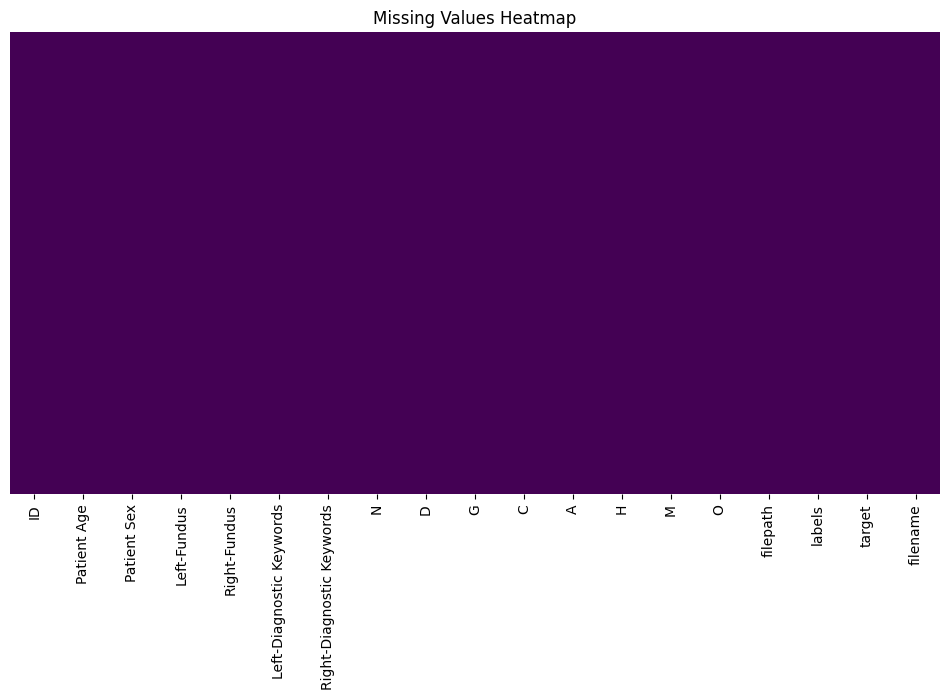


Target Variable Distribution:
 target
[1, 0, 0, 0, 0, 0, 0, 0]    2873
[0, 1, 0, 0, 0, 0, 0, 0]    1608
[0, 0, 0, 0, 0, 0, 0, 1]     708
[0, 0, 0, 1, 0, 0, 0, 0]     293
[0, 0, 1, 0, 0, 0, 0, 0]     284
[0, 0, 0, 0, 1, 0, 0, 0]     266
[0, 0, 0, 0, 0, 0, 1, 0]     232
[0, 0, 0, 0, 0, 1, 0, 0]     128
Name: count, dtype: int64


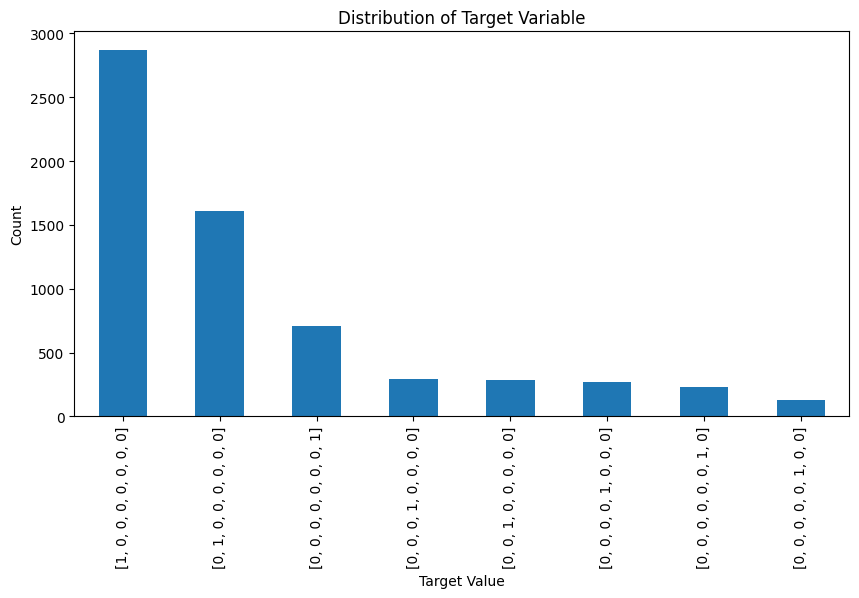


Diagnosis Prevalence:
 N    2101
D    2123
G     397
C     402
A     319
H     203
M     306
O    1588
dtype: int64


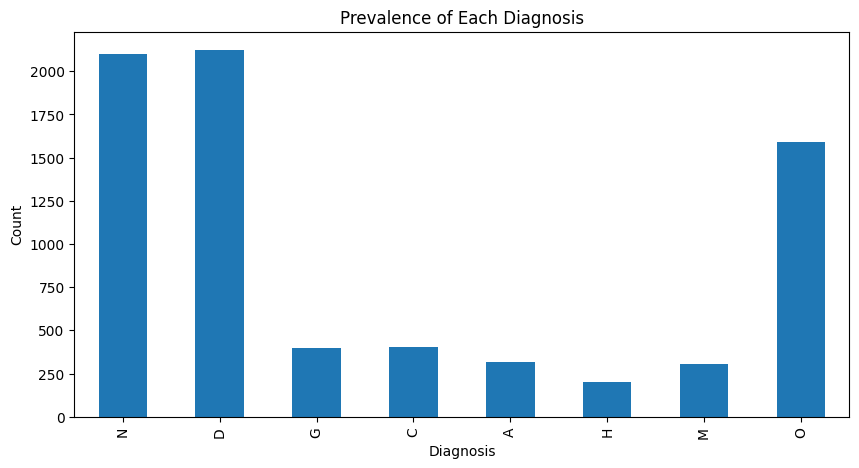

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print("Data Types:\n", df.dtypes)

# 2. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Visualize missing data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 3. Analyze target variable distribution
target_counts = df['target'].value_counts()
print("\nTarget Variable Distribution:\n", target_counts)

plt.figure(figsize=(10, 5))
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()

# Calculate the prevalence of each diagnosis
# Assuming one-hot encoding, sum the columns representing each diagnosis
diagnosis_prevalence = df[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].sum()
print("\nDiagnosis Prevalence:\n", diagnosis_prevalence)

plt.figure(figsize=(10, 5))
diagnosis_prevalence.plot(kind='bar')
plt.title('Prevalence of Each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

**Reasoning**:
Investigate relationships between features and the target variable, including correlations and visualizations. Explore unique values in diagnostic keywords.



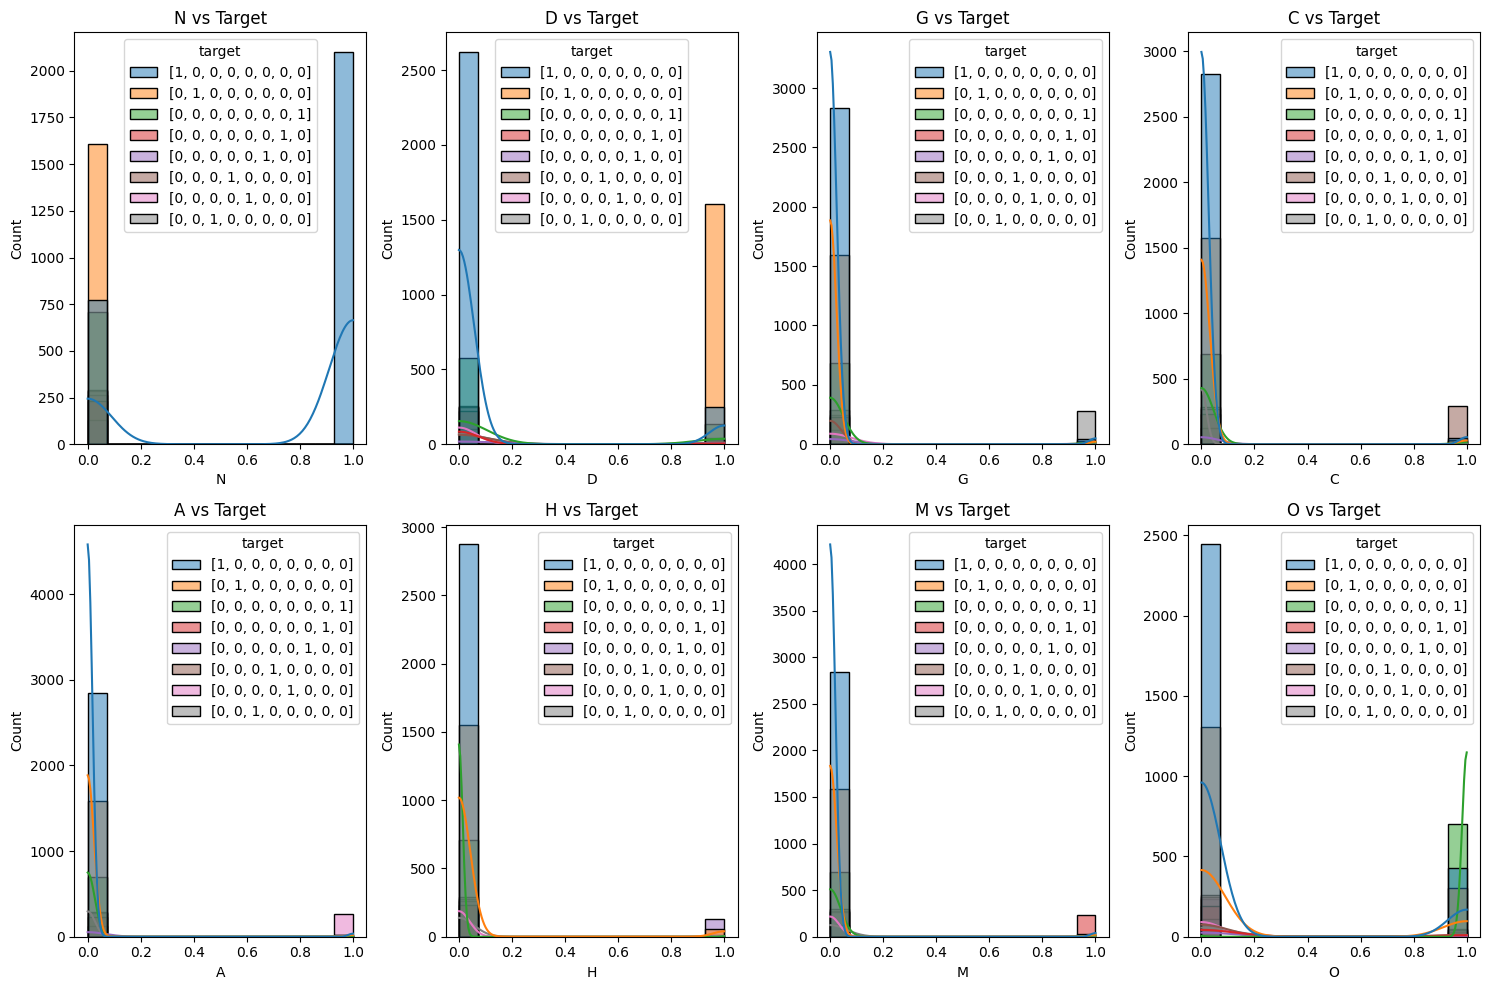


Unique Left Diagnostic Keywords:
 ['cataract' 'normal fundus'
 'laser spot，moderate non proliferative retinopathy'
 'macular epiretinal membrane' 'moderate non proliferative retinopathy'
 'drusen' 'epiretinal membrane'
 'moderate non proliferative retinopathy，hypertensive retinopathy'
 'pathological myopia' 'mild nonproliferative retinopathy'
 'hypertensive retinopathy'
 'macular epiretinal membrane，mild nonproliferative retinopathy'
 'macular hole' 'wet age-related macular degeneration'
 'moderate non proliferative retinopathy，laser spot'
 'moderate non proliferative retinopathy，myelinated nerve fibers'
 'dry age-related macular degeneration'
 'epiretinal membrane，myelinated nerve fibers' 'diabetic retinopathy'
 'epiretinal membrane，lens dust' 'atrophy'
 'laser spot，white vessel，moderate non proliferative retinopathy'
 'chorioretinal atrophy' 'moderate non proliferative retinopathy，cataract'
 'retinitis pigmentosa'
 'moderate non proliferative retinopathy，retina fold'
 'normal fundus

<ipython-input-3-134cd36070c6>:38: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


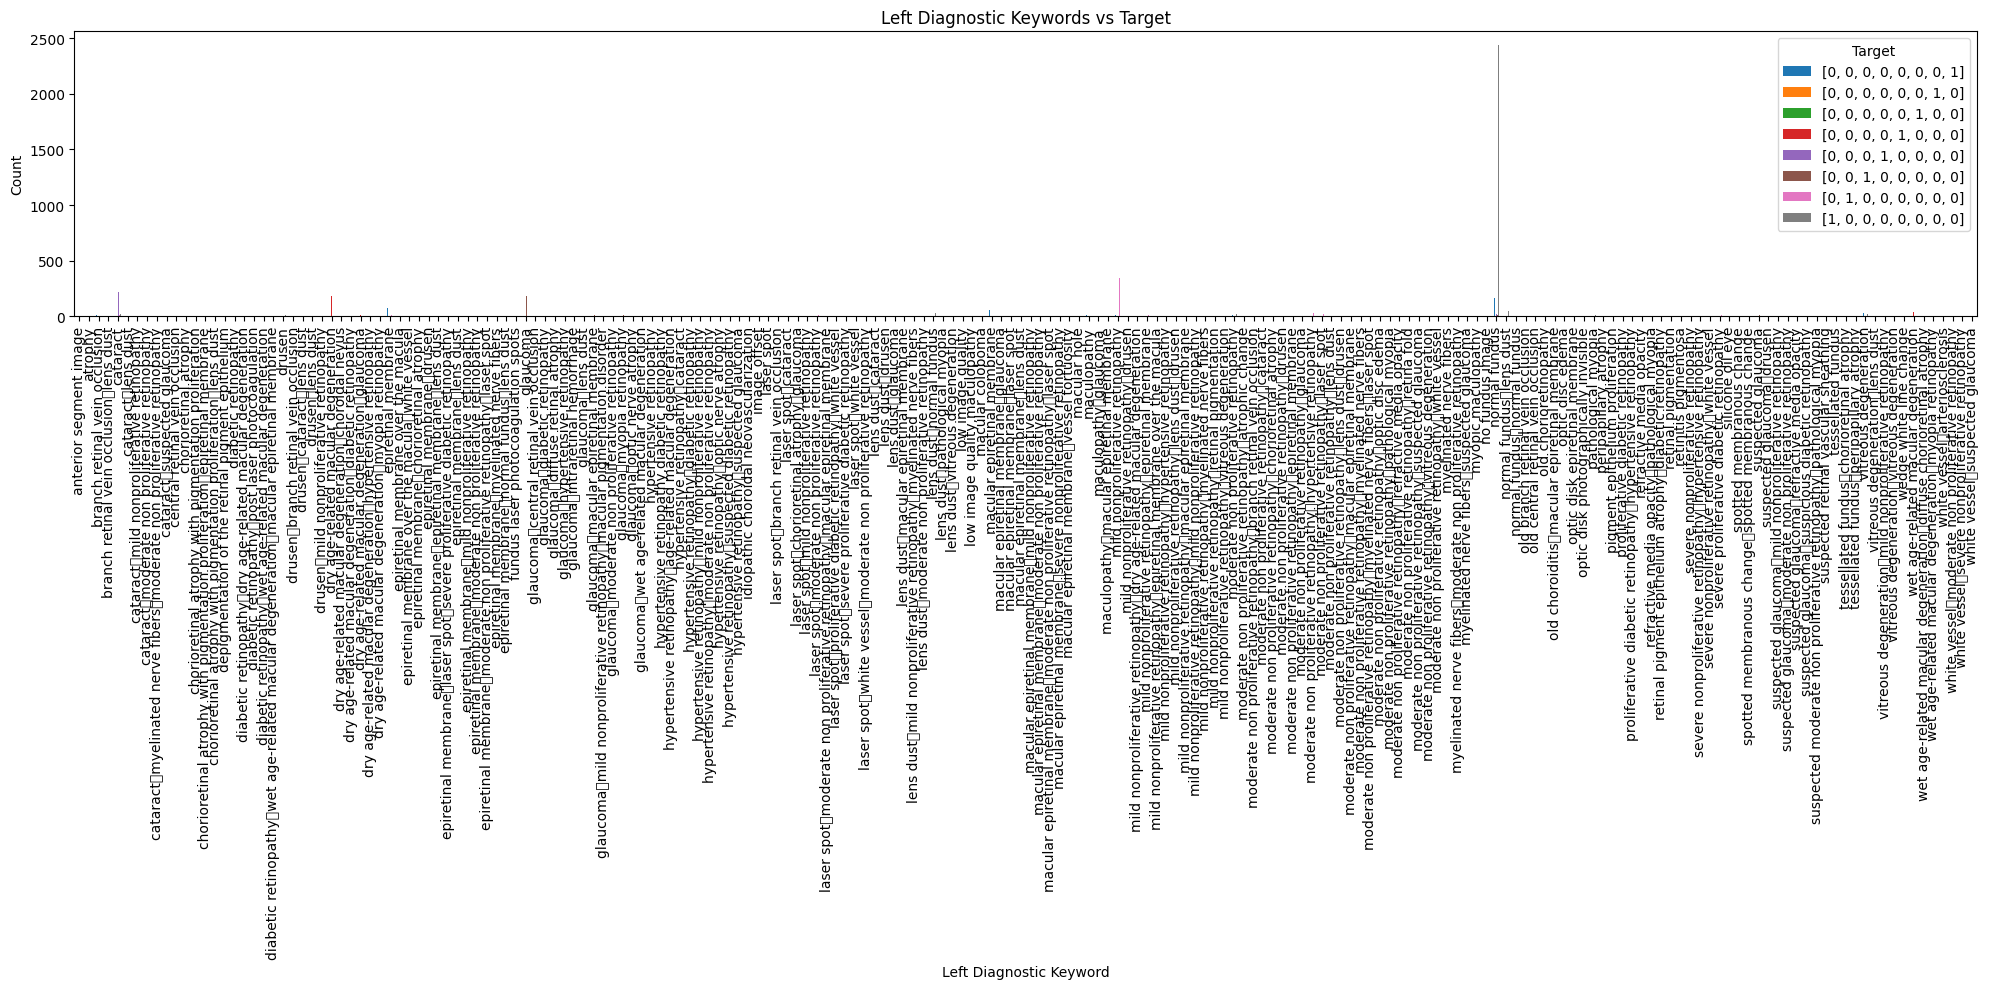

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Investigate relationships between features and the target variable
# Calculate correlations (if applicable) between numerical features and the target
# Since 'target' is a list-like object, we cannot directly calculate correlation.
# We will analyze the relationship between each of N, D, G, C, A, H, M, O and target counts
# instead.
numerical_features = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.histplot(x=feature, hue='target', data=df, kde=True)
    plt.title(f'{feature} vs Target')

plt.tight_layout()
plt.show()

# Explore the unique values within the 'Left-Diagnostic Keywords' and
# 'Right-Diagnostic Keywords' columns.
print("\nUnique Left Diagnostic Keywords:\n", df['Left-Diagnostic Keywords'].unique())
print("\nUnique Right Diagnostic Keywords:\n", df['Right-Diagnostic Keywords'].unique())

# Determine if there are any patterns or relationships between these keywords
# and the target variable.
# We can explore this by creating cross-tabulations or grouped bar charts.
# Example using 'Left-Diagnostic Keywords':
keyword_counts = df.groupby(['Left-Diagnostic Keywords', 'target']).size().unstack(fill_value=0)
print("\nKeyword Counts:\n", keyword_counts)

keyword_counts.plot(kind='bar', figsize=(20, 10))
plt.title('Left Diagnostic Keywords vs Target')
plt.xlabel('Left Diagnostic Keyword')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Target')
plt.tight_layout()
plt.show()

**Reasoning**:
Summarize findings in a markdown cell, noting potential issues and insights. Include relevant visualizations.



In [ ]:
print("Summary of Data Exploration:")
print("\nData Types and Missing Values:")
print("The dataset has 6392 samples and 19 features. No missing values were found.")
print("\nTarget Variable Distribution:")
print("The 'target' variable appears to be one-hot encoded, representing eight diagnoses.  However, its data type is 'object' and needs to be converted for modeling.")
print("The class distribution is imbalanced, with a majority of samples belonging to the first class, indicating a potential need for class weighting or other balancing techniques during model training.")
print("\nFeature Relationships:")
print("Histograms were generated showing the relationship between the numeric disease labels ('N', 'D', 'G', 'C', 'A', 'H', 'M', 'O') and the target variable.  Further analysis of the diagnostic keywords is required.")
print("\nPotential Issues:")
print("1. Class Imbalance:  Address the class imbalance in the target variable.")
print("2. Target Variable Type: Convert the 'target' variable to a numeric type.")
print("3. Diagnostic Keywords: Further analyze the diagnostic keywords for potential relationships with the target.")
print("\nNext Steps:")
print("1. Convert the 'target' column to a numeric format.")
print("2. Address the class imbalance.")
print("3. Perform further analysis of the diagnostic keywords.")
print("4. Feature engineering.")

Summary of Data Exploration:

Data Types and Missing Values:
The dataset has 6392 samples and 19 features. No missing values were found.

Target Variable Distribution:
The 'target' variable appears to be one-hot encoded, representing eight diagnoses.  However, its data type is 'object' and needs to be converted for modeling.
The class distribution is imbalanced, with a majority of samples belonging to the first class, indicating a potential need for class weighting or other balancing techniques during model training.

Feature Relationships:
Histograms were generated showing the relationship between the numeric disease labels ('N', 'D', 'G', 'C', 'A', 'H', 'M', 'O') and the target variable.  Further analysis of the diagnostic keywords is required.

Potential Issues:
1. Class Imbalance:  Address the class imbalance in the target variable.
2. Target Variable Type: Convert the 'target' variable to a numeric type.
3. Diagnostic Keywords: Further analyze the diagnostic keywords for potential

## Data preparation

### Subtask:
Prepare the data for modeling by handling the target variable and addressing class imbalance.


**Reasoning**:
Convert the 'target' column to numerical representation and address class imbalance using stratified train-test split and RandomOverSampler.



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Convert the 'target' column to numerical representation
# Since it seems to be already one-hot encoded, we can find the index of the maximum value
df['target_encoded'] = df['target'].apply(lambda x: np.argmax(eval(x)))

# Separate features (X) and target (y)
X = df.drop(['target', 'target_encoded'], axis=1)
y = df['target_encoded']

# Split data into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Address class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Create a new DataFrame with balanced training data
df_balanced = pd.DataFrame(X_train_balanced, columns=X_train.columns)
df_balanced['target_encoded'] = y_train_balanced

display(df_balanced.head())
print(df_balanced.shape)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,filename,target_encoded
0,727,43,Male,727_left.jpg,727_right.jpg,drusen,drusen,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],727_left.jpg,7
1,4509,57,Male,4509_left.jpg,4509_right.jpg,mild nonproliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],4509_left.jpg,1
2,3068,58,Male,3068_left.jpg,3068_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],3068_right.jpg,0
3,4349,46,Male,4349_left.jpg,4349_right.jpg,mild nonproliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],4349_left.jpg,1
4,2857,55,Female,2857_left.jpg,2857_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],2857_right.jpg,0


(18384, 19)


## Feature engineering

### Subtask:
Engineer new features from the existing dataset, focusing on the image file paths and diagnostic keywords.


**Reasoning**:
Engineer new features from image file paths and diagnostic keywords, then combine and select these features with existing ones. Finally, prepare the dataframe for the next step by dropping unnecessary columns.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Image File Path Features
def extract_image_features(df):
    df['left_image_exists'] = df['Left-Fundus'].notna().astype(int)
    df['right_image_exists'] = df['Right-Fundus'].notna().astype(int)
    return df

df_balanced = extract_image_features(df_balanced)


# 2. Diagnostic Keyword Features
def extract_keyword_features(df):
    vectorizer = TfidfVectorizer(max_features=50) # Limit to top 50 features
    left_keywords_tfidf = vectorizer.fit_transform(df['Left-Diagnostic Keywords']).toarray()
    right_keywords_tfidf = vectorizer.fit_transform(df['Right-Diagnostic Keywords']).toarray()

    # Combine keyword representations (simple addition for demonstration)
    combined_keywords_tfidf = left_keywords_tfidf + right_keywords_tfidf

    # Create new columns in the dataframe
    for i in range(combined_keywords_tfidf.shape[1]):
        df[f'keyword_{i}'] = combined_keywords_tfidf[:, i]

    return df

df_balanced = extract_keyword_features(df_balanced)


# 3. Combine and Select Features
# Already combined in previous steps


# 4. Dataframe for next step
columns_to_drop = ['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
                   'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G', 'C',
                   'A', 'H', 'M', 'O', 'filepath', 'labels', 'filename', 'target']
try:
    df_engineered = df_balanced.drop(columns=columns_to_drop, errors='ignore')
except KeyError as e:
    print(f"Error dropping column: {e}")
    df_engineered = df_balanced.copy() # Create a copy to avoid modifying the original dataframe

display(df_engineered.head())
print(df_engineered.shape)

,target_encoded,left_image_exists,right_image_exists,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,...,keyword_40,keyword_41,keyword_42,keyword_43,keyword_44,keyword_45,keyword_46,keyword_47,keyword_48,keyword_49
0,7,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.382408,0.357021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.382408,0.357021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(18384, 53)


## Data splitting

### Subtask:
Split the engineered data into training, validation, and testing sets.


**Reasoning**:
Split the engineered data into training, validation, and testing sets using `train_test_split` with stratification to maintain class proportions across the splits.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_engineered.drop('target_encoded', axis=1)
y = df_engineered['target_encoded']

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(14707, 52) (1838, 52) (1839, 52)
(14707,) (1838,) (1839,)


## Model training

### Subtask:
Train a RandomForestClassifier on the prepared data.


**Reasoning**:
Train a RandomForestClassifier on the prepared data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the classifier
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained RandomForestClassifier model.


**Reasoning**:
Evaluate the trained RandomForestClassifier model using the validation set and visualize the results.



Accuracy: 0.9466811751904244
Precision: 0.9486860030752408
Recall: 0.9466811751904244
F1-score: 0.9458597563540698


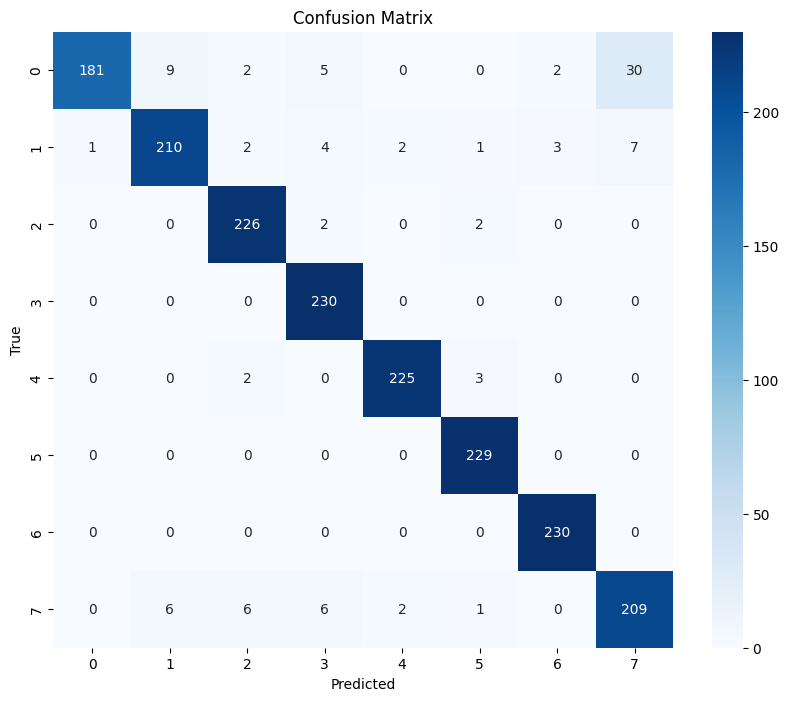

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the validation set
y_pred = rf_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Calculate and visualize the confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(8), yticklabels=range(8))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model optimization

### Subtask:
Optimize the RandomForestClassifier model by tuning its hyperparameters using GridSearchCV.


**Reasoning**:
Optimize the RandomForestClassifier model using GridSearchCV with the defined parameter grid.



Accuracy: 0.9472252448313384
Precision: 0.9492836026251571
Recall: 0.9472252448313384
F1-score: 0.946408489457039


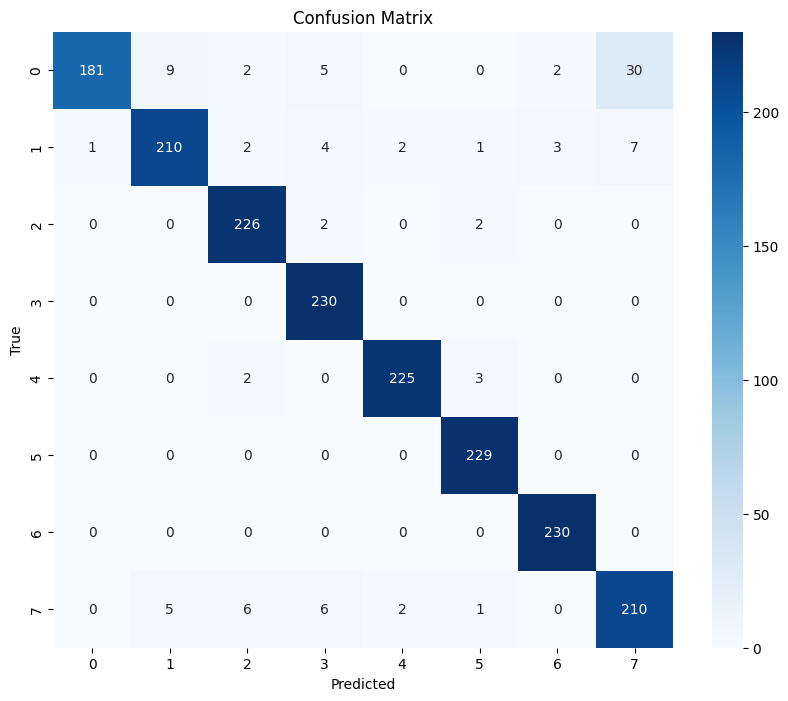

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9439048745016656


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='f1_weighted', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Evaluate the best estimator on the validation set
y_pred = best_rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(8), yticklabels=range(8))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)